In [7]:
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import wandb

from generator import QuantumGenerator
from generator import Generator
from discriminator.discriminator import Discriminator
from trainer import ClassicalTrainer, ClassifierTrainer
from trainer import QuantumTrainer
from data_loader import ImageDataset, ImageTransform, make_01_datapath_list, make_bas_4_datapath_list
from utils import visualize_accuracy
from optimizer.adam import Adam
%matplotlib inline


wandb.login()
config = dict(
    N = 8,
    num_epoch = 800,
    log_freq = 100,
    batch_size = 7,
    num_mask = 28,
    mean = 0,
    std = 3e-3,
    g_lr = 3e-3,
    d_lr = 1e-3,
    c_lr = 5e-3,
    betas = (0.9, 0.999),
)
tags = "1"
wandb.init(
    project="GANProject",
    config=config,
    name="classical_sgan",
    tags=tags
)

wandb: wandb version 0.12.6 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [8]:
datapath_list, label_list = make_01_datapath_list()
train_path_list, test_path_list, train_label_list, test_label_list = train_test_split(datapath_list, label_list, test_size=0.5)

We use cuda
----------------------------------------
Epoch: 100 ||G_Loss: 0.6553577184677124 ||D_Loss: 0.290135600737163 ||Epoch_Accuracy: 0.6428571939468384 ||Timer: 6.59905219078064
----------------------------------------
Epoch: 200 ||G_Loss: 0.3675302011626107 ||D_Loss: 0.2930509150028229 ||Epoch_Accuracy: 0.6428571939468384 ||Timer: 6.829525470733643
----------------------------------------
Epoch: 300 ||G_Loss: 0.5121049710682459 ||D_Loss: 0.2483665645122528 ||Epoch_Accuracy: 0.6785714626312256 ||Timer: 6.380626916885376
----------------------------------------
Epoch: 400 ||G_Loss: 0.537130628313337 ||D_Loss: 0.24260070068495612 ||Epoch_Accuracy: 0.5714285969734192 ||Timer: 6.700498580932617
----------------------------------------
Epoch: 500 ||G_Loss: 0.4873676896095276 ||D_Loss: 0.2360323965549469 ||Epoch_Accuracy: 0.6071428656578064 ||Timer: 6.903260946273804
----------------------------------------
Epoch: 600 ||G_Loss: 0.5893867526735579 ||D_Loss: 0.2615445213658469 ||Epoch_Ac

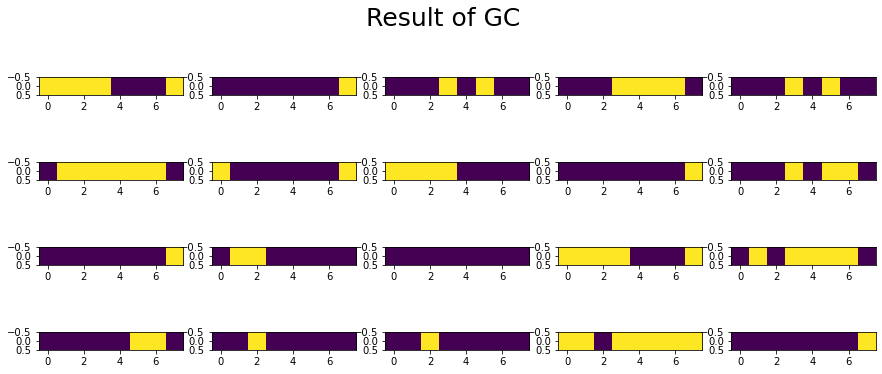

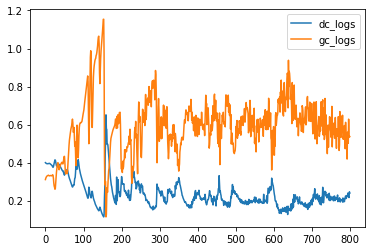

_runtime,60
_timestamp,1636607002
_step,1599
G_Loss,0.53699
D_Loss,0.23907
Epoch_Accuracy,0.60714
best_accuracy,0.71429


_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
G_Loss,▂▁▂▄▃▆█▇▂▅▃▄▅▆▆▅▄▂▅▅▅▄▆▅▅▄▄▄▅▅▆▆▅▅▆▆▄▅▅▄
D_Loss,▇▇▆▅█▄▃▂█▂▄▃▄▂▂▃▄▅▂▃▃▄▂▂▃▂▂▂▃▄▁▁▂▂▂▃▄▃▃▄
Epoch_Accuracy,▁▁▁▄▁▇▃▅▅▆▇▇▇▇▇█▇▄▅▅▆▆▇▇▆▅▅▅▅▅▆▆▅▆▆▆▇▇▆▆


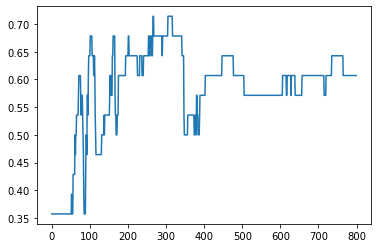

In [9]:
train_dataset = ImageDataset(train_path_list, wandb.config.num_mask, transform=ImageTransform(wandb.config.mean, wandb.config.std), label_list=train_label_list)
test_dataset = ImageDataset(test_path_list, wandb.config.num_mask, transform=ImageTransform(wandb.config.mean, wandb.config.std), label_list=test_label_list)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=wandb.config.batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=wandb.config.batch_size, shuffle=True)

G = Generator(input_size=20, output_size=wandb.config.N, hidden_size=40)
D = Discriminator(input_size=wandb.config.N, output_size=wandb.config.N, hidden_size=56, num_classes=2)
g_optimizer = torch.optim.Adam(G.parameters(), wandb.config.g_lr, wandb.config.betas)
d_optimizer = torch.optim.Adam(D.parameters(), wandb.config.d_lr, wandb.config.betas)

trainer_classical = ClassicalTrainer(
    generator=G,
    discriminator=D,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    g_optimizer=g_optimizer,
    d_optimizer=d_optimizer,
    z_dim=20,
    num_classes=2
)
g_loss, d_loss, accuracy = trainer_classical.train(wandb.config.num_epoch, wandb.config.log_freq)
trainer_classical.visualize_G_image()
trainer_classical.visualize_logs(g_loss, d_loss)
plt.plot(range(len(accuracy)), accuracy)

wandb.finish()

wandb: wandb version 0.12.6 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


We use cuda
----------------------------------------
Epoch: 100 ||C_Loss: 0.005222444538958371 ||Epoch_Accuracy: 0.5714285714285714 ||Timer: 2.216604471206665
----------------------------------------
Epoch: 200 ||C_Loss: 0.0012017450644634664 ||Epoch_Accuracy: 0.5714285714285714 ||Timer: 2.071016788482666
----------------------------------------
Epoch: 300 ||C_Loss: 0.0005146452840563143 ||Epoch_Accuracy: 0.5714285714285714 ||Timer: 2.263953685760498
----------------------------------------
Epoch: 400 ||C_Loss: 0.0002778863090497907 ||Epoch_Accuracy: 0.5714285714285714 ||Timer: 2.2066407203674316
----------------------------------------
Epoch: 500 ||C_Loss: 0.00016899552974791732 ||Epoch_Accuracy: 0.5714285714285714 ||Timer: 2.146023750305176
----------------------------------------
Epoch: 600 ||C_Loss: 0.00011028167318727355 ||Epoch_Accuracy: 0.5714285714285714 ||Timer: 2.103564500808716
----------------------------------------
Epoch: 700 ||C_Loss: 7.571305104647763e-05 ||Epoch_Accura

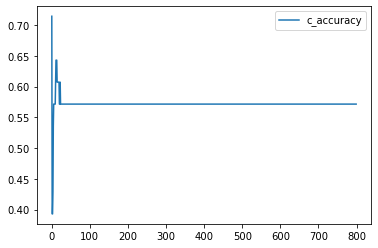

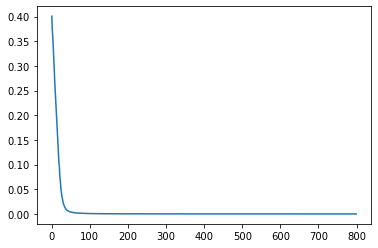

Epoch_C_Loss,5e-05
Epoch_Accuracy,0.57143
_runtime,23
_timestamp,1636607034
_step,799
best_accuracy,0.71429


Epoch_C_Loss,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Epoch_Accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
_runtime,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇█████
_timestamp,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇█████
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


In [10]:
wandb.init(
    project="GANProject",
    config=config,
    name="classifier",
    tags=tags
)

c_loss_list = []
c_accuracy_list = []
C = Discriminator(input_size=wandb.config.N, output_size=wandb.config.N, hidden_size=56, num_classes=2)
c_optimizer = torch.optim.Adam(C.parameters(), wandb.config.c_lr, wandb.config.betas)
trainer_classifier = ClassifierTrainer(
    classifier=C,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    c_optimizer=c_optimizer)
c_loss, c_accuracy = trainer_classifier.train(wandb.config.num_epoch, wandb.config.log_freq)

plt.plot(range(wandb.config.num_epoch), c_accuracy, label="c_accuracy")
plt.legend()
plt.show()

plt.plot(range(wandb.config.num_epoch), c_loss)
plt.show()

wandb.finish()

In [19]:
wandb.init(
    project="GANProject",
    config=config,
    name="quantum_sgan",
    tags=tags
)

wandb.config.update({
    "g_lr": 8-3,
    "d_lr": 1e-3,
    "num_mask": 28,
    "num_epoch": 300
})

wandb: wandb version 0.12.6 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


We use cuda
----------------------------------------
Epoch: 100 ||G_Loss: 2.778122842311859 ||D_Loss: 5.696382403373718 ||Epoch_Accuracy: 0.7142857313156128 ||Timer: 17.180306434631348
----------------------------------------
Epoch: 200 ||G_Loss: 3.9898681640625 ||D_Loss: 3.9868141412734985 ||Epoch_Accuracy: 0.8214285969734192 ||Timer: 18.13881230354309
----------------------------------------
Epoch: 300 ||G_Loss: 5.818208336830139 ||D_Loss: 3.0607105493545532 ||Epoch_Accuracy: 0.8214285969734192 ||Timer: 17.12736701965332


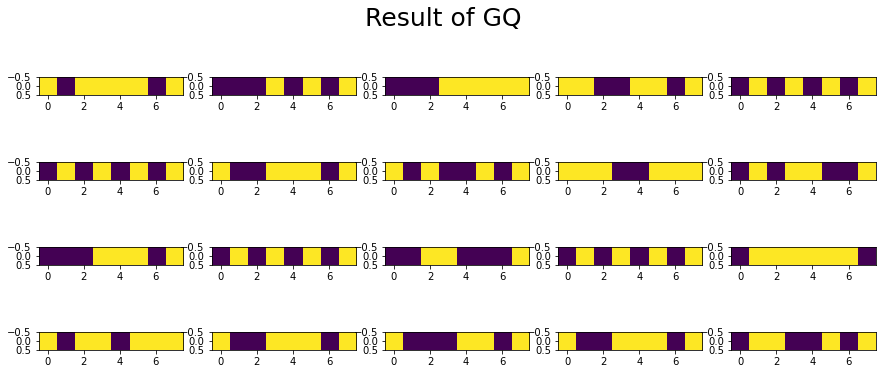

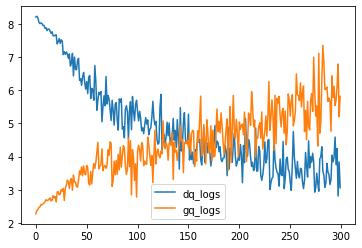

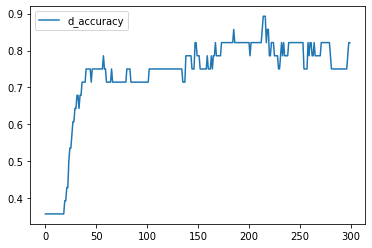

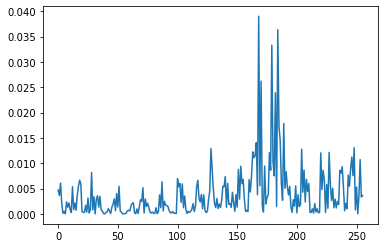

_runtime,59
_timestamp,1636611363
_step,599
Epoch_DQ_Loss,3.06071
Epoch_GQ_Loss,5.81821
Epoch_Accuracy,0.82143
best_accuracy,0.89286


_runtime,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
Epoch_DQ_Loss,███▇▇▆▆▅▅▅▅▅▃▅▄▅▅▄▄▃▂▃▃▃▂▃▂▃▂▂▂▂▃▁▂▂▁▂▂▁
Epoch_GQ_Loss,▁▁▁▂▂▂▃▂▃▄▂▄▄▂▃▂▄▄▃▄▅▅▃▃▅▆▃▃▅▄▄▆▆▆▆▆▅█▇▆
Epoch_Accuracy,▁▁▁▃▅▆▆▆▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇█▇▇▇▇▇▇▇▇▆▆▇


In [20]:
G = QuantumGenerator(num_qubit=wandb.config.N, depth=4, optimizer=Adam(wandb.config.g_lr, betas=wandb.config.betas))
D = Discriminator(input_size=wandb.config.N, output_size=wandb.config.N, hidden_size=56)
d_optimizer = torch.optim.Adam(D.parameters(), wandb.config.d_lr, wandb.config.betas)

trainer_quantum = QuantumTrainer(
    generator=G,
    discriminator=D,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    d_optimizer=d_optimizer,
    num_classes=2
)

g_loss, d_loss, accuracy = trainer_quantum.train(wandb.config.num_epoch, wandb.config.log_freq)

trainer_quantum.visualize_GQ_image(wandb.config.N)
trainer_quantum.visualize_logs(g_loss, d_loss)
plt.plot(range(wandb.config.num_epoch), accuracy, label="d_accuracy")
plt.legend()
plt.show()

trainer_quantum.visualize_probability()
plt.show()

wandb.finish()